# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [40]:
# Code Here
import pandas as pd
from plotnine import *
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [26]:
!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins = penguins.dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [6]:
#Dummify Species, Island, and Sex Variables
# Convert the variables to categorical
penguins['species'] = penguins['species'].astype('category')
penguins['island'] = penguins['island'].astype('category')
penguins['sex'] = penguins['sex'].astype('category')

#Create dummy variables
species_dummies = pd.get_dummies(penguins['species'], prefix='species', drop_first=True)
island_dummies = pd.get_dummies(penguins['island'], prefix='island', drop_first=True)
sex_dummies = pd.get_dummies(penguins['sex'], prefix='sex', drop_first=True)

# Join the dummy variables to the original penguins dataframe
penguins_df = pd.concat([penguins, species_dummies, island_dummies, sex_dummies], axis=1)

# Display the head of the dataframe
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,0,0,0,1,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0,0,0,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0,0,0,1,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0,0,0,1,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,0,0,0,1,1


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [29]:
lr = LinearRegression()

#Model 1: All predictor variables
X = penguins_df[['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Chinstrap', 'species_Gentoo', 'island_Dream', 'island_Torgersen', 'sex_male']]
y = penguins['bill_depth_mm']

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=1)

#Fit model based on the training data
model_1 = lr.fit(X_train, y_train)

#Use test data to predict
y_prediction_1 = lr.predict(X_test)

#Calculate MSE
mse_model_1 = mean_squared_error(y_test, y_prediction_1)
print(f"MSE of Model 1: {mse_model_1}")

#Calculate R Squared
r2_model_1 = r2_score(y_test, y_prediction_1)
print(f"R Squared of Model 1: {r2_model_1}")

MSE of Model 1: 0.5316301053103945
R Squared of Model 1: 0.8662646341808219


In [30]:
#Model 2: All Variables Except Sex
X = penguins_df[['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Chinstrap', 'species_Gentoo', 'island_Dream', 'island_Torgersen']]
y = penguins['bill_depth_mm']

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=1)

#Fit model based on the training data
model_2 = lr.fit(X_train, y_train)

#Use test data to predict
y_prediction_2 = lr.predict(X_test)

#Calculate MSE
mse_model_2 = mean_squared_error(y_test, y_prediction_2)
print(f"MSE of Model 2: {mse_model_2}")

#Calculate R Squared
r2_model_2 = r2_score(y_test, y_prediction_2)
print(f"R Squared of Model 2: {r2_model_2}")

MSE of Model 2: 0.570829076947343
R Squared of Model 2: 0.8564038517322016


In [31]:
#Model 3: All variables except island
X = penguins_df[['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Chinstrap', 'species_Gentoo', 'sex_male']]
y = penguins['bill_depth_mm']

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=1)

#Fit model based on the training data
model_3 = lr.fit(X_train, y_train)

#Use test data to predict
y_prediction_3 = lr.predict(X_test)

#Calculate MSE
mse_model_3 = mean_squared_error(y_test, y_prediction_3)
print(f"MSE of Model 3: {mse_model_3}")

#Calculate R Squared
r2_model_3 = r2_score(y_test, y_prediction_3)
print(f"R Squared of Model 3: {r2_model_3}")

MSE of Model 3: 0.531787952289775
R Squared of Model 3: 0.8662249266410869


In [36]:
#Model 4: All variables except species and sex
X = penguins_df[['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'island_Dream', 'island_Torgersen']]
y = penguins['bill_depth_mm']

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=1)

#Fit model based on the training data
model_4 = lr.fit(X_train, y_train)

#Use test data to predict
y_prediction_4 = lr.predict(X_test)

#Calculate MSE
mse_model_4 = mean_squared_error(y_test, y_prediction_4)
print(f"MSE of Model 4: {mse_model_4}")

#Calculate R Squared
r2_model_4 = r2_score(y_test, y_prediction_4)
print(f"R Squared of Model 4: {r2_model_4}")

MSE of Model 4: 2.1007382727144264
R Squared of Model 4: 0.4715442210937575


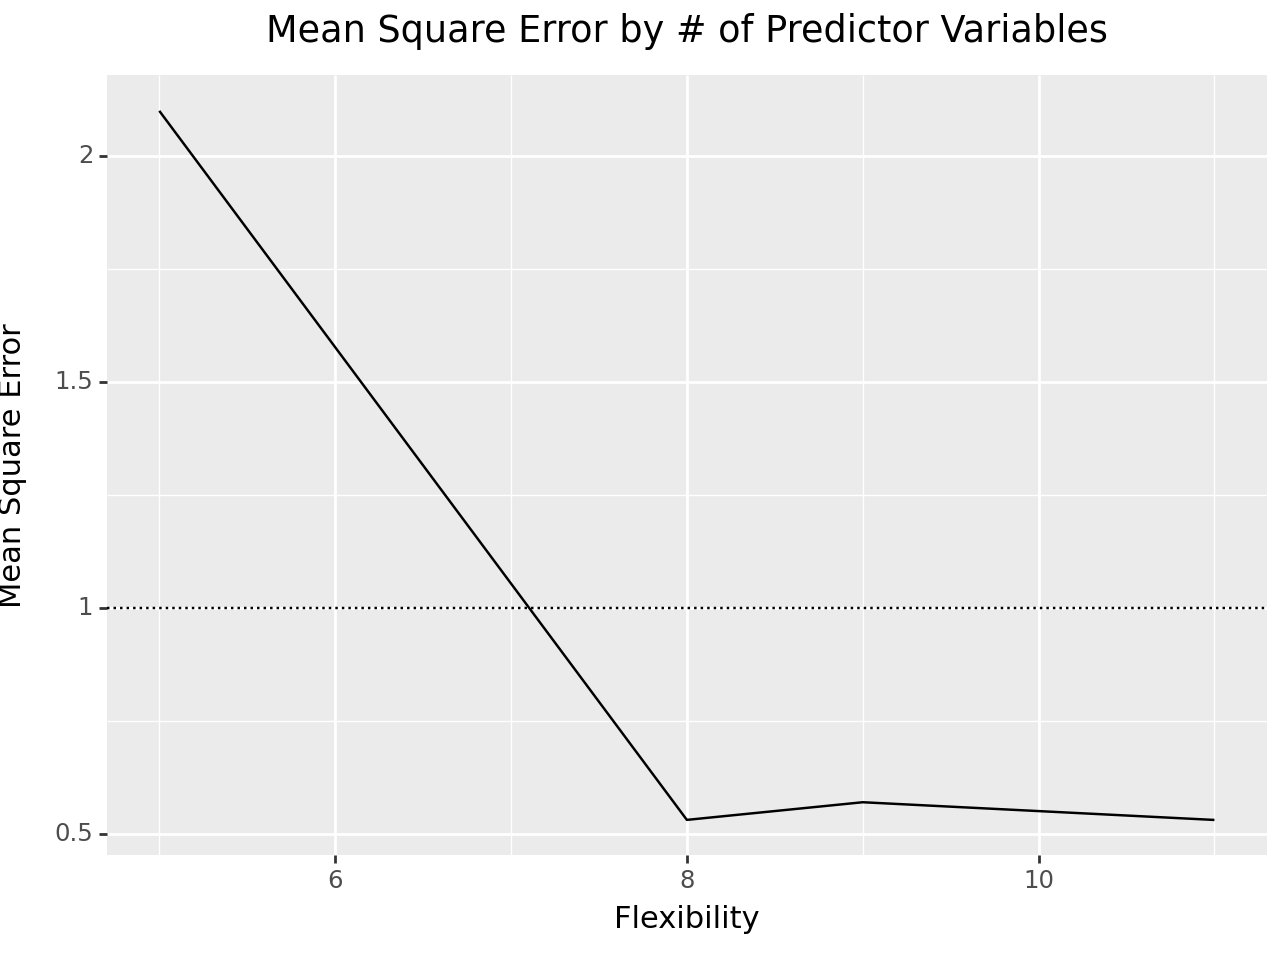

In [38]:
#Create a plot like the right plot of Fig 1. in our Model Validation chapter
#Create new data frame to use to plot
mse_df = pd.DataFrame({
    'Predictors': [11, 9, 8, 5],
    'Mean_Square_Error': [mse_model_1, mse_model_2, mse_model_3, mse_model_4]
})

#Make the plot
mse_plot = (ggplot(mse_df, aes('Predictors', 'Mean_Square_Error', group =1))
  + geom_line()
  + geom_hline(aes(yintercept = 1), linetype = "dotted")
  + labs(x = "Flexibility", y = "Mean Square Error", title = "Mean Square Error by # of Predictor Variables")
  + theme(title=element_text(hjust=0.5))
            )

print(mse_plot)

In [39]:
#Print all MSE and R^2 Values to compare models
#Calculate MSE
print(f"MSE of Model 1: {mse_model_1}")
print(f"R Squared of Model 1: {r2_model_1}")
print(f"MSE of Model 2: {mse_model_2}")
print(f"R Squared of Model 2: {r2_model_2}")
print(f"MSE of Model 3: {mse_model_3}")
print(f"R Squared of Model 3: {r2_model_3}")
print(f"MSE of Model 4: {mse_model_4}")
print(f"R Squared of Model 4: {r2_model_4}")

MSE of Model 1: 0.5316301053103945
R Squared of Model 1: 0.8662646341808219
MSE of Model 2: 0.570829076947343
R Squared of Model 2: 0.8564038517322016
MSE of Model 3: 0.531787952289775
R Squared of Model 3: 0.8662249266410869
MSE of Model 4: 2.1007382727144264
R Squared of Model 4: 0.4715442210937575


Model 1 and Model 3 are nearly identical in terms of MSE and R^2. However, Model 3 is more simple than Model 1 since it does not include island dummy variables. Thereofre, I would consider model 3 to be the best overall.